In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
info = pd.read_csv('survey_results_schema.csv', index_col = 'qname')
data = pd.read_csv('survey_results_public.csv')

In [3]:
data

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73264,73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73265,73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN
73266,73267,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN


In [4]:
data['DevType'][4]


'Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, QA or test'

In [5]:
selfDescribe = data.groupby('MainBranch')['MainBranch'].count()
selfDescribe

MainBranch
I am a developer by profession                                                   53507
I am learning to code                                                             6309
I am not primarily a developer, but I write code sometimes as part of my work     5794
I code primarily as a hobby                                                       4865
I used to be a developer by profession, but no longer am                          1296
None of these                                                                     1497
Name: MainBranch, dtype: int64

In [6]:
selfDescribe.index.tolist()

['I am a developer by profession',
 'I am learning to code',
 'I am not primarily a developer, but I write code sometimes as part of my work',
 'I code primarily as a hobby',
 'I used to be a developer by profession, but no longer am',
 'None of these']

# how stackOkverflow users would decribe themselves



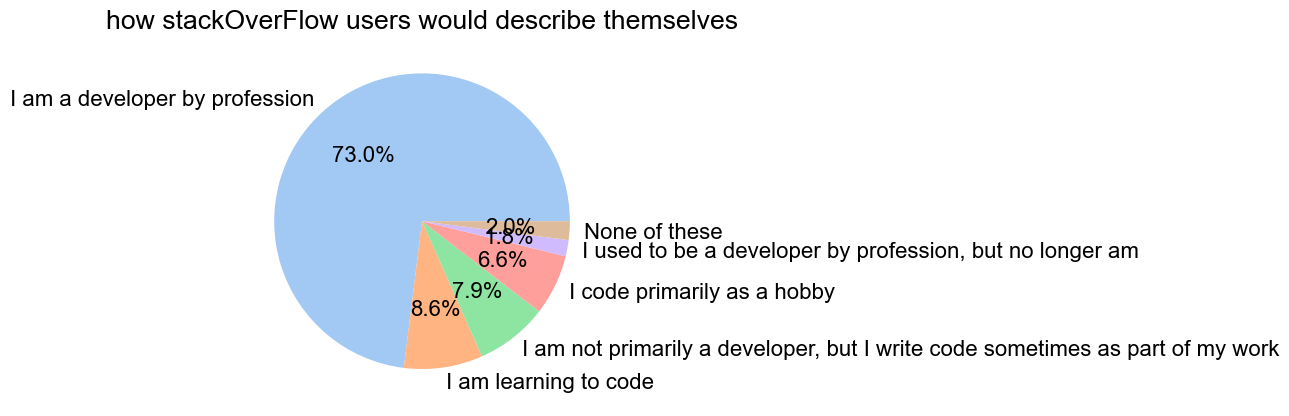

In [44]:
plt.title('how stackOverFlow users would describe themselves')
colors = sns.color_palette('pastel')

plt.pie(selfDescribe,
       labels = selfDescribe.index.tolist(),
       autopct = '%.1f%%',
       colors = colors)
plt.show()

# what degree have developers

In [8]:
degree = data.groupby('EdLevel')['ResponseId'].count().sort_values(ascending = 1).to_frame()
degree

,ResponseId
EdLevel,
"Professional degree (JD, MD, etc.)",1121
Something else,1247
Primary/elementary school,1806
"Other doctoral degree (Ph.D., Ed.D., etc.)",2169
"Associate degree (A.A., A.S., etc.)",2236
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",7904
Some college/university study without earning a degree,9326
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15486
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",30276


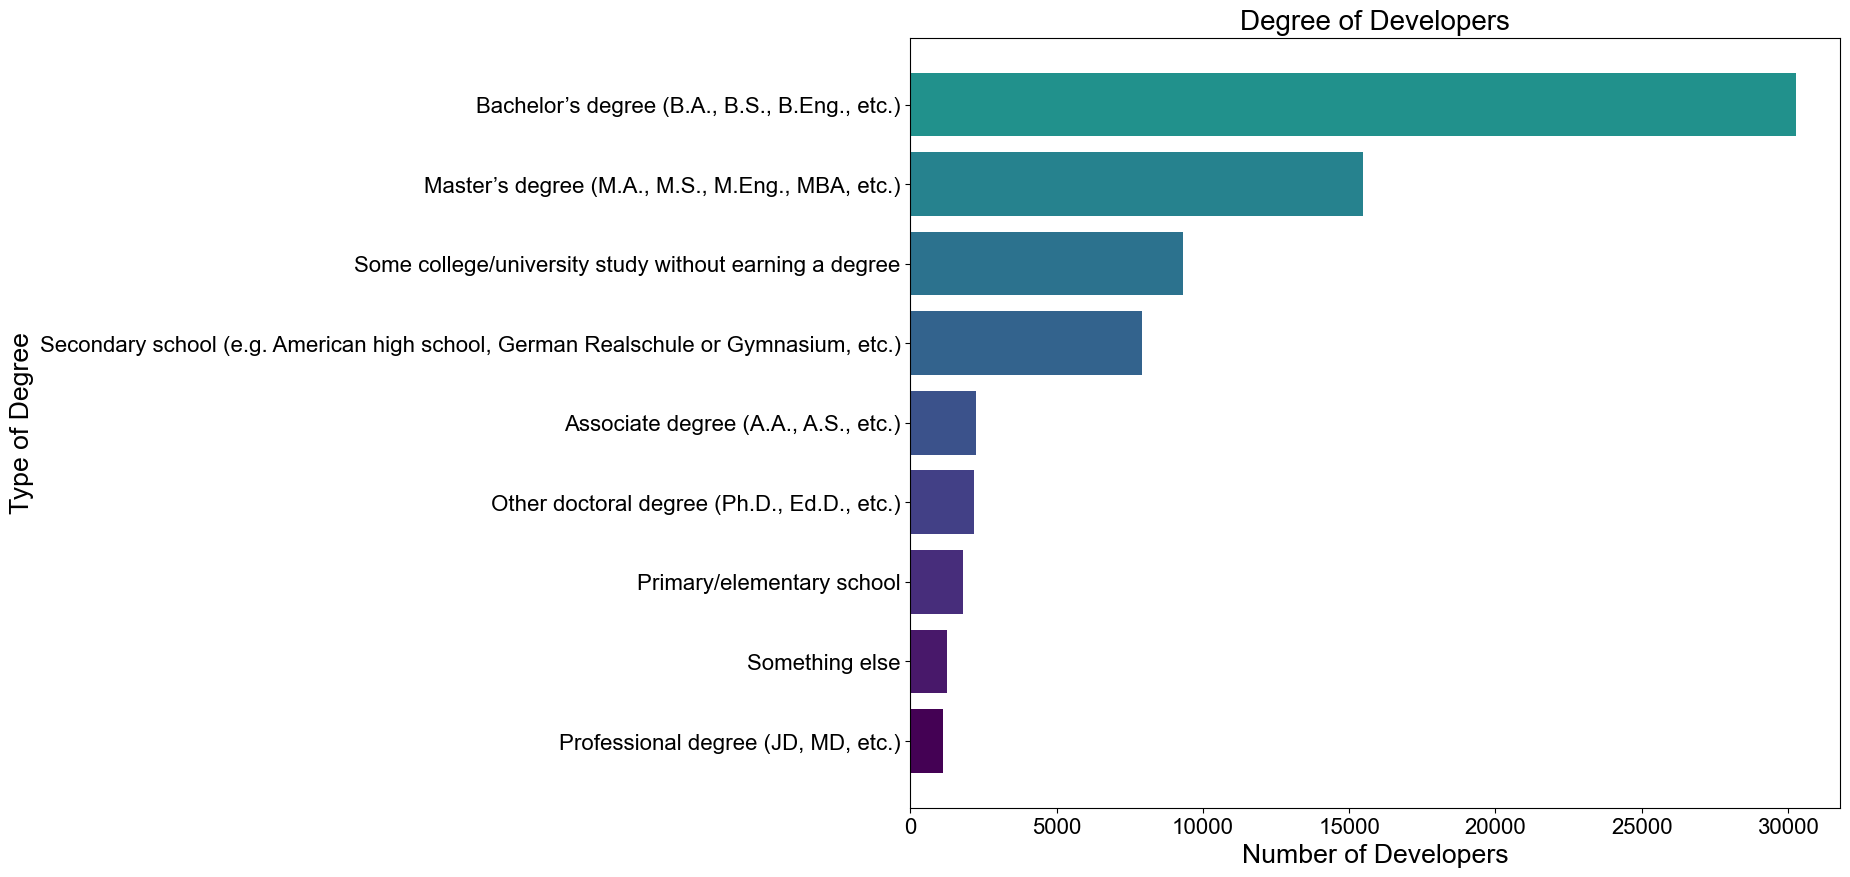

In [45]:
# Set size
plt.figure(figsize=(12, 10))

# Set font
font = {'family': 'Arial', 'size': 16}
plt.rc('font', **font)

# Set colormap
cmap = plt.colormaps['viridis']

# Set number of bars
num_bars = len(degree)

# Create a sequence of colors
colors = np.linspace(0, 0.5, num_bars)

# Plot
plt.barh(degree.index, degree['ResponseId'], color=cmap(colors))

# Title and labels
plt.title('Degree of Developers', fontsize=20)
plt.xlabel('Number of Developers', fontsize='large')
plt.ylabel('Type of Degree', fontsize='large')

# Show the plot
plt.show()

# type od developer

In [10]:
all_types = [dev_type for sublist in data['DevType'].str.split(';').tolist() if isinstance(sublist, list) for dev_type in sublist]

dev_counts = pd.Series(all_types).value_counts()

dev_counts_df = pd.DataFrame({'Type': dev_counts.index, 'Count': dev_counts.values})

dev_counts_df

,Type,Count
0,"Developer, full-stack",28701
1,"Developer, back-end",26595
2,"Developer, front-end",15915
3,"Developer, desktop or enterprise applications",9546
4,"Developer, mobile",7634
5,DevOps specialist,6170
6,Student,5595
7,Cloud infrastructure engineer,5283
8,Database administrator,4934
9,System administrator,4908


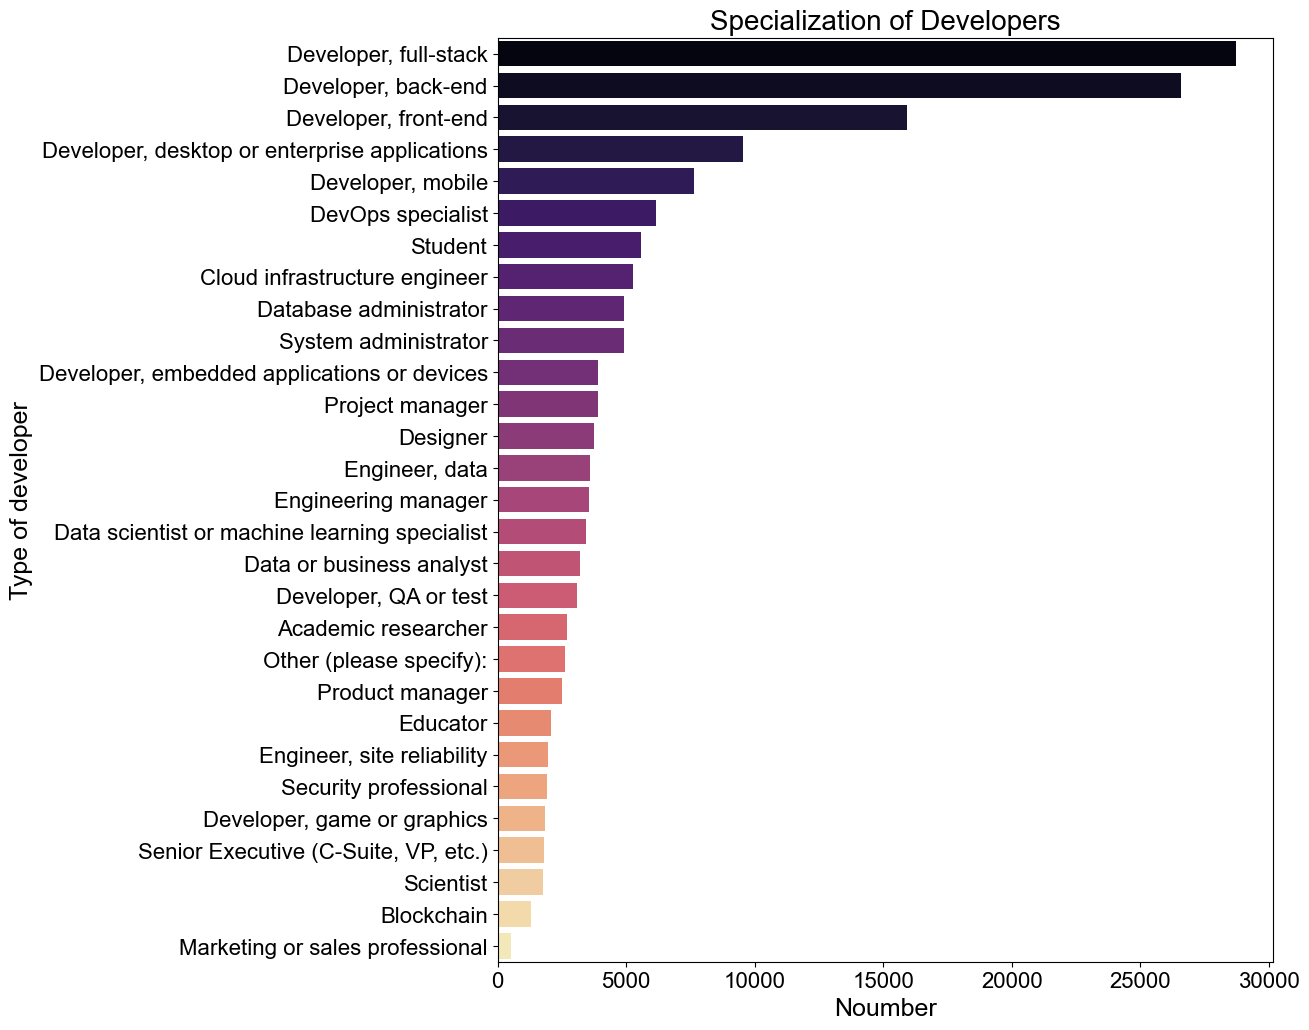

In [75]:
#set size
plt.figure(figsize = (10, 12))

#plot
sns.barplot(
    data=dev_counts_df,
    x='Count',
    y='Type',
    palette='magma')

# labels and title
plt.xlabel('Noumber', fontsize = 18)
plt.ylabel('Type of developer', fontsize = 18)
plt.title('Specialization of Developers', fontsize = 20)

# show
plt.show()

# degree of developers specialized in machine learning and data science

In [12]:
edOfDataDevelopers = data[data['DevType'].str.contains('Data scientist or machine learning specialist', na=False)]
counts_by_edlevel = edOfDataDevelopers.groupby('EdLevel').size().reset_index(name='Count')
counts_by_edlevel = counts_by_edlevel.sort_values('Count')

In [13]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

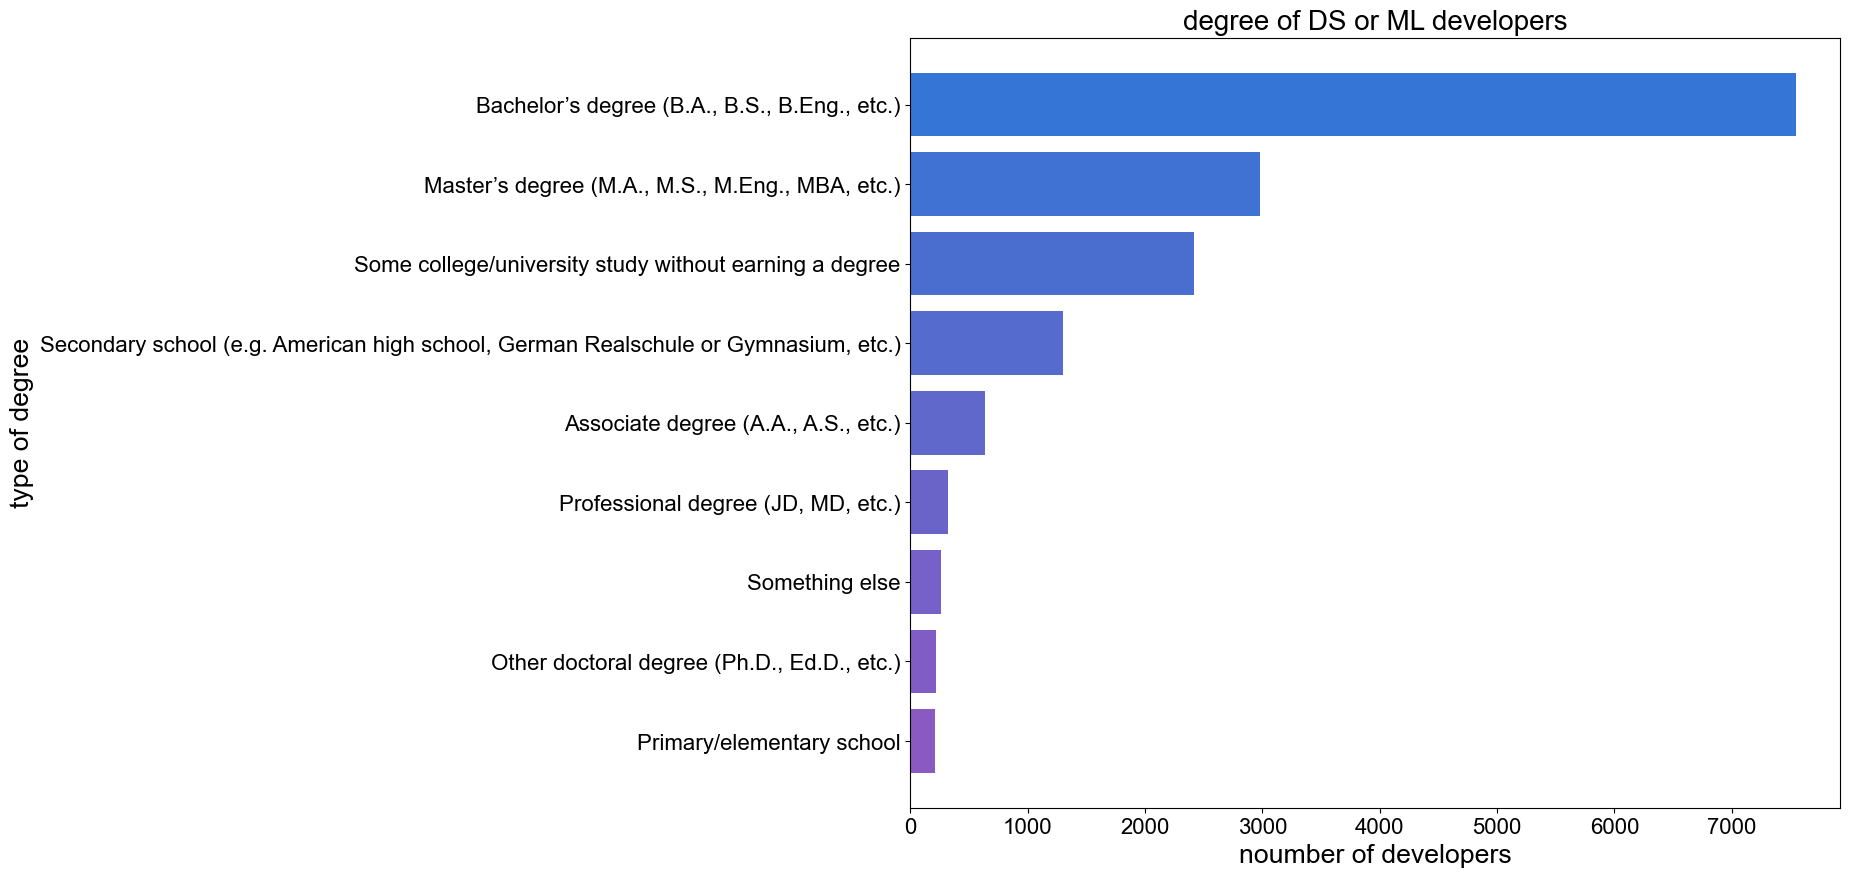

In [47]:
#set size
plt.figure(figsize = (12, 10))

#font
font = {'family': 'Arial',
        'size': 16}

plt.rc('font', **font)

#set colors
color1 = "#8A5AC2"
color2 = "#3575D5"
colors = get_color_gradient(color1, color2, len(degree))

#plot
plt.barh(
    counts_by_edlevel.EdLevel, 
    counts_by_edlevel.Count,
    color=colors)

#title and labels
plt.title('degree of DS or ML developers', fontsize = 20)
plt.xlabel('noumber of developers', fontsize = 'large')
plt.ylabel('type of degree', fontsize = 'large')

#show
plt.show()

# degree of developers specialized in machine learning and data science

In [15]:
edOfDataDevelopers = data[data['DevType'].str.contains('Blockchain', na=False)]
counts_by_edlevel = edOfDataDevelopers.groupby('EdLevel').size().reset_index(name='Count')
counts_by_edlevel = counts_by_edlevel.sort_values('Count')

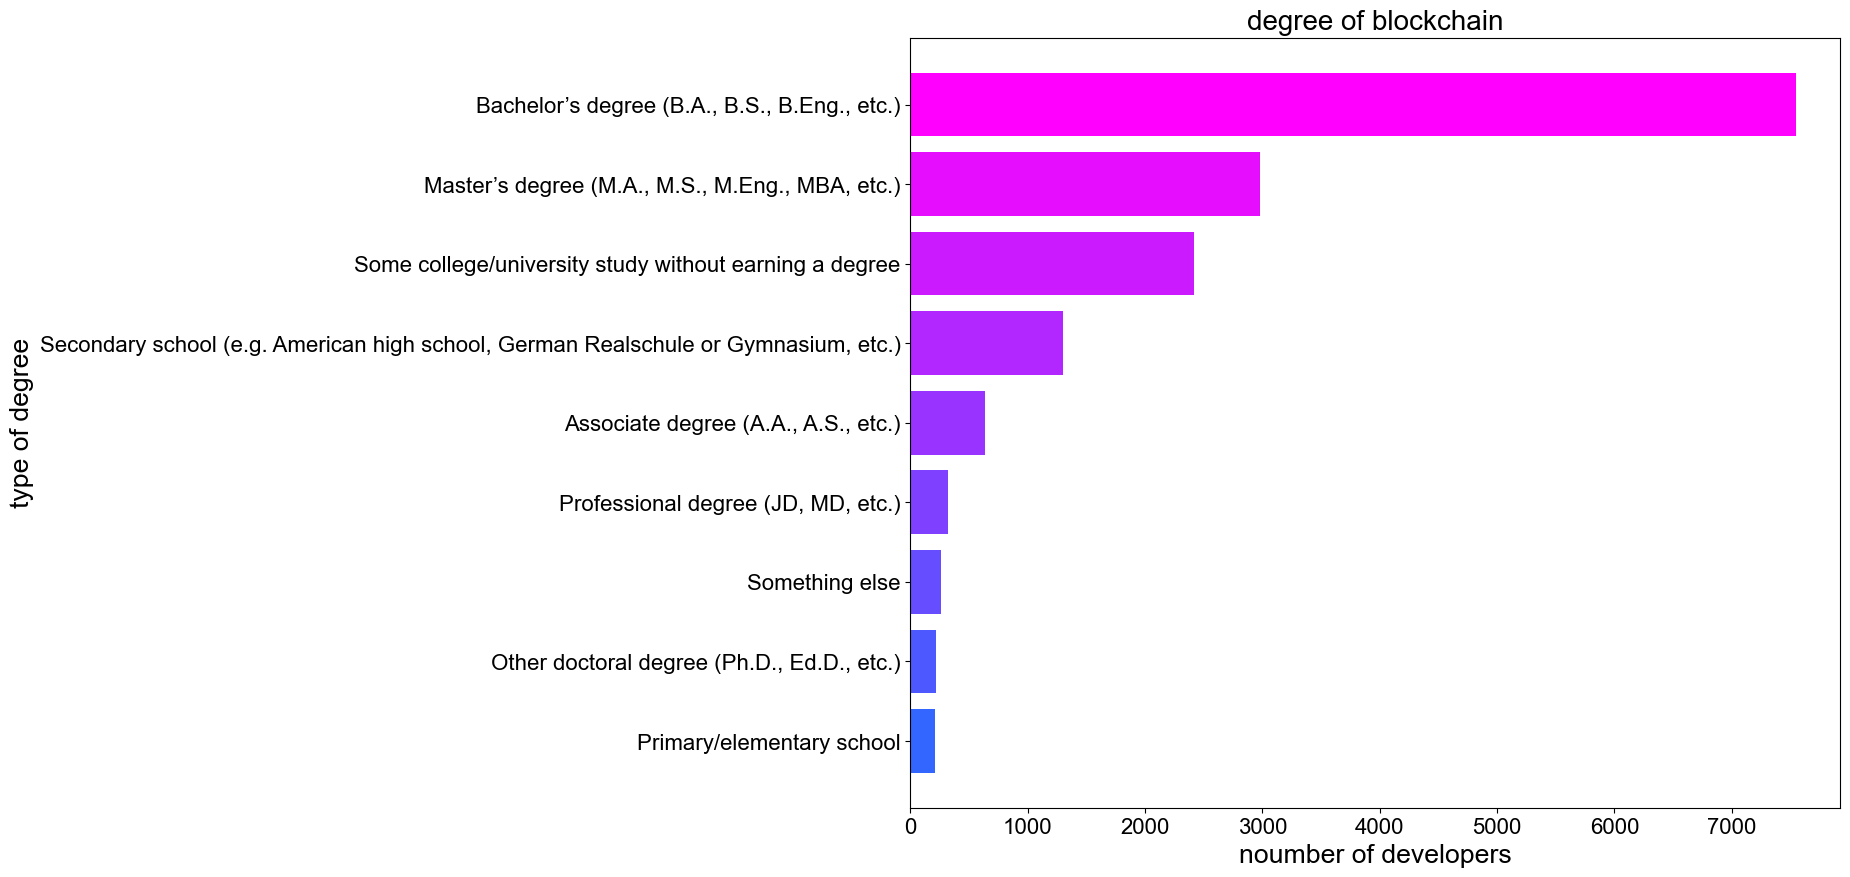

In [48]:
#set size
plt.figure(figsize = (12, 10))

#font
font = {'family': 'Arial',
        'size': 16}

plt.rc('font', **font)

#set colors
color1 = "#3366ff"
color2 = "#ff00ff"
colors = get_color_gradient(color1, color2, len(degree))

#plot
plt.barh(
    counts_by_edlevel.EdLevel, 
    counts_by_edlevel.Count,
    color=colors)

#title and labels
plt.title('degree of blockchain', fontsize = 20)
plt.xlabel('noumber of developers', fontsize = 'large')
plt.ylabel('type of degree', fontsize = 'large')

#show
plt.show()

# degree of developers specialized in frontend

In [17]:
edOfDataDevelopers = data[data['DevType'].str.contains('Developer, front-end', na=False)]
counts_by_edlevel = edOfDataDevelopers.groupby('EdLevel').size().reset_index(name='Count')
counts_by_edlevel = counts_by_edlevel.sort_values('Count')

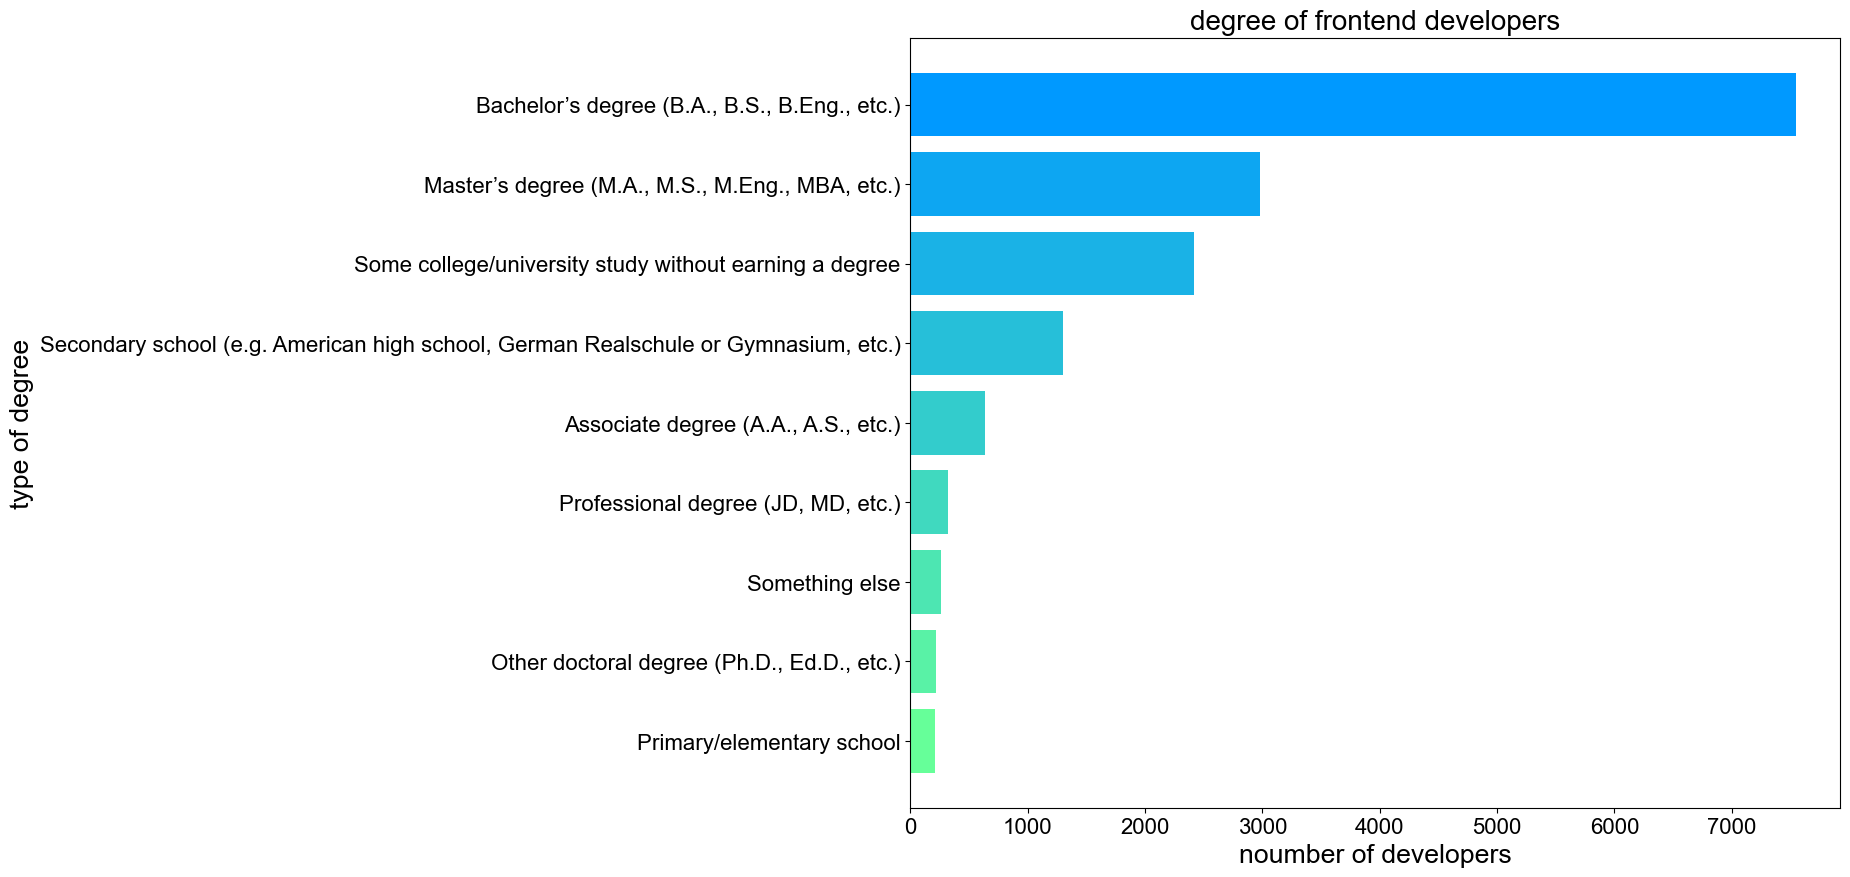

In [74]:
#set size
plt.figure(figsize = (12, 10))

#font
font = {'family': 'Arial',
        'size': 16}

plt.rc('font', **font)

#set colors
color1 = "#66ff99"
color2 = "#0099ff"
colors = get_color_gradient(color1, color2, len(degree))

#plot
plt.barh(
    counts_by_edlevel.EdLevel, 
    counts_by_edlevel.Count,
    color=colors)

#title and labels
plt.title('degree of frontend developers', fontsize = 20)
plt.xlabel('noumber of developers', fontsize = 'large')
plt.ylabel('type of degree', fontsize = 'large')

#show
plt.show()

# from where developers work

In [55]:
place = data.groupby('RemoteWork')['RemoteWork'].count()
place

RemoteWork
Full in-person                           8596
Fully remote                            25341
Hybrid (some remote, some in-person)    25021
Name: RemoteWork, dtype: int64

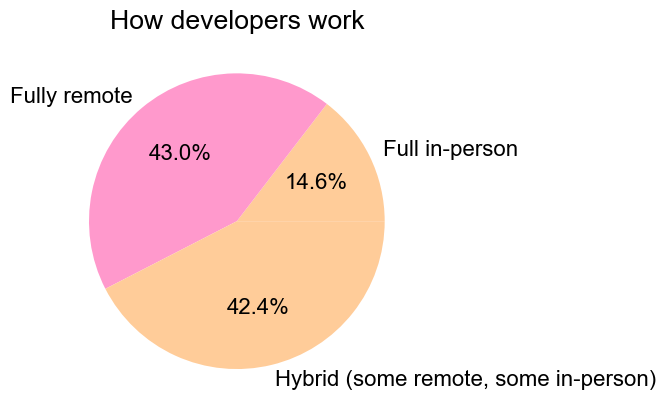

In [56]:
# Colors
color1 = "#ffcc99"
color2 = "#ff99cc"
colors = [color1, color2]

# Plot
plt.pie(
    place,
    labels=place.index,
    autopct='%.1f%%',
    colors=colors)

# Title
plt.title('How developers work')

# Save the chart as an image file
plt.savefig('fromWhereDevelopersWork.png')

# Show the chart
plt.show()

# from where DS or ML developers work

In [58]:
place = data[data['DevType'].str.contains('Data scientist or machine learning specialist', na=False)]
place = place.groupby('RemoteWork').size().reset_index(name='Count')
place

,RemoteWork,Count
0,Full in-person,442
1,Fully remote,1178
2,"Hybrid (some remote, some in-person)",1680


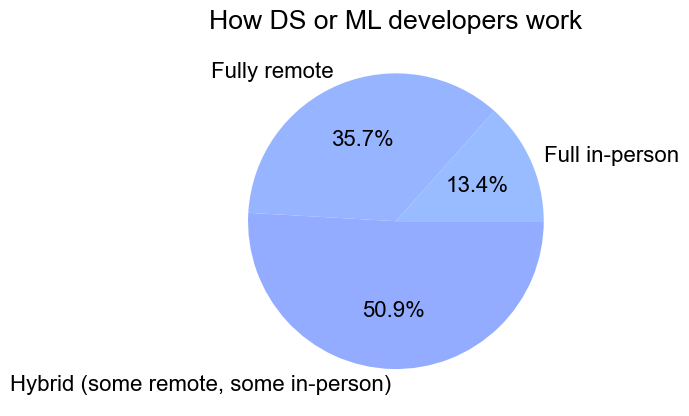

In [59]:
#colors
color1 = "#99bbff"
color2 = "#8080ff"
colors = get_color_gradient(color1, color2, len(degree))

#plot
plt.pie(
    place.Count,
    labels = place.RemoteWork,
    autopct = '%.1f%%',
    colors = colors)

#title
plt.title('How DS or ML developers work')

#show
plt.savefig('fromWhereDsAdnMlWork.png')
plt.show()

# what languages developers program in

In [27]:
used = [lang for sublist in data['LanguageHaveWorkedWith'].str.split(';').tolist() if isinstance(sublist, list) for lang in sublist]
used = pd.Series(used).value_counts()
used = pd.DataFrame({'Type': used.index, 'Count': used.values})

numb = len(data)
used.Count = used.Count / numb * 100

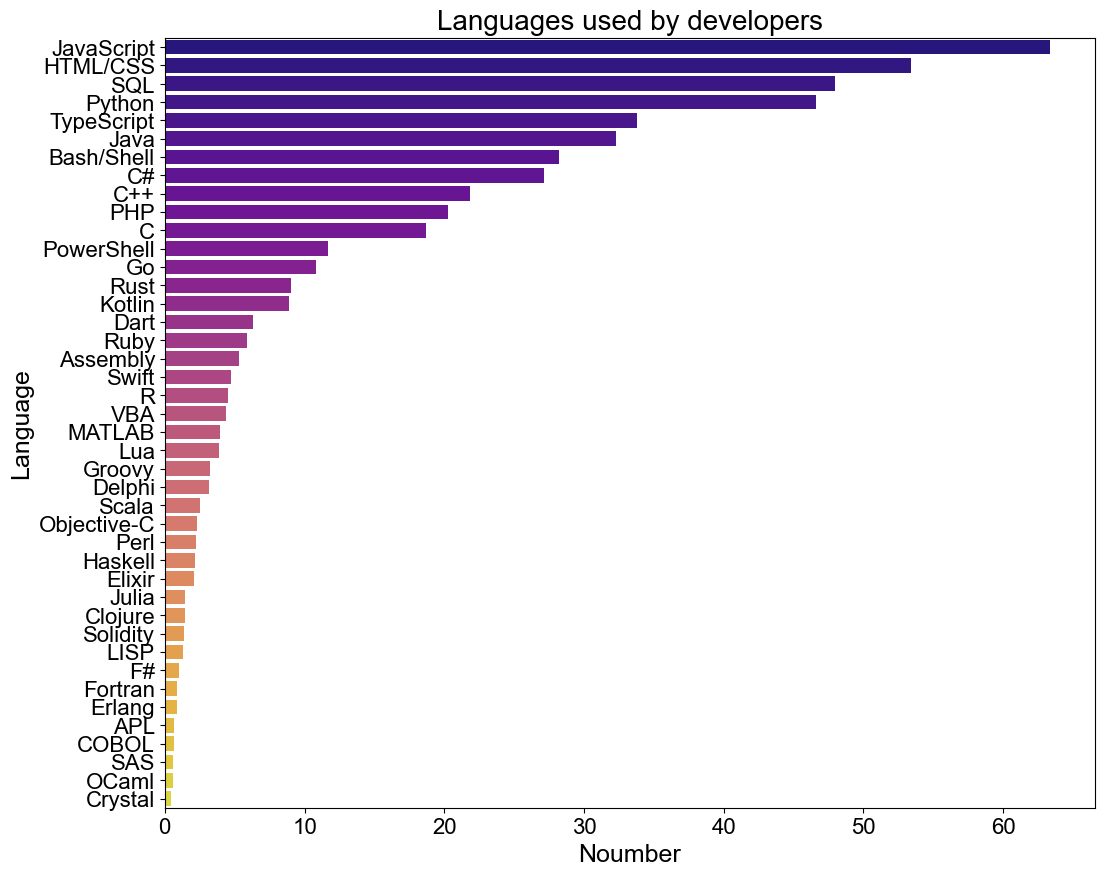

In [60]:
#set size
plt.figure(figsize = (12, 10))

#plot
sns.barplot(
    data=used,
    x='Count',
    y='Type',
    palette='plasma')

# labels and title
plt.xlabel('Noumber', fontsize = 18)
plt.ylabel('Language', fontsize = 18)
plt.title('Languages used by developers', fontsize = 20)

# show
plt.savefig('languagesUsedByDevelopers.png')
plt.show()

# what languages developers want to program in

In [30]:
want = [lang for sublist in data['LanguageWantToWorkWith'].str.split(';').tolist() if isinstance(sublist, list) for lang in sublist]
want = pd.Series(want).value_counts()
want = pd.DataFrame({'Type': want.index, 'Count': want.values})

numb = len(data)
want.Count = want.Count / numb * 100

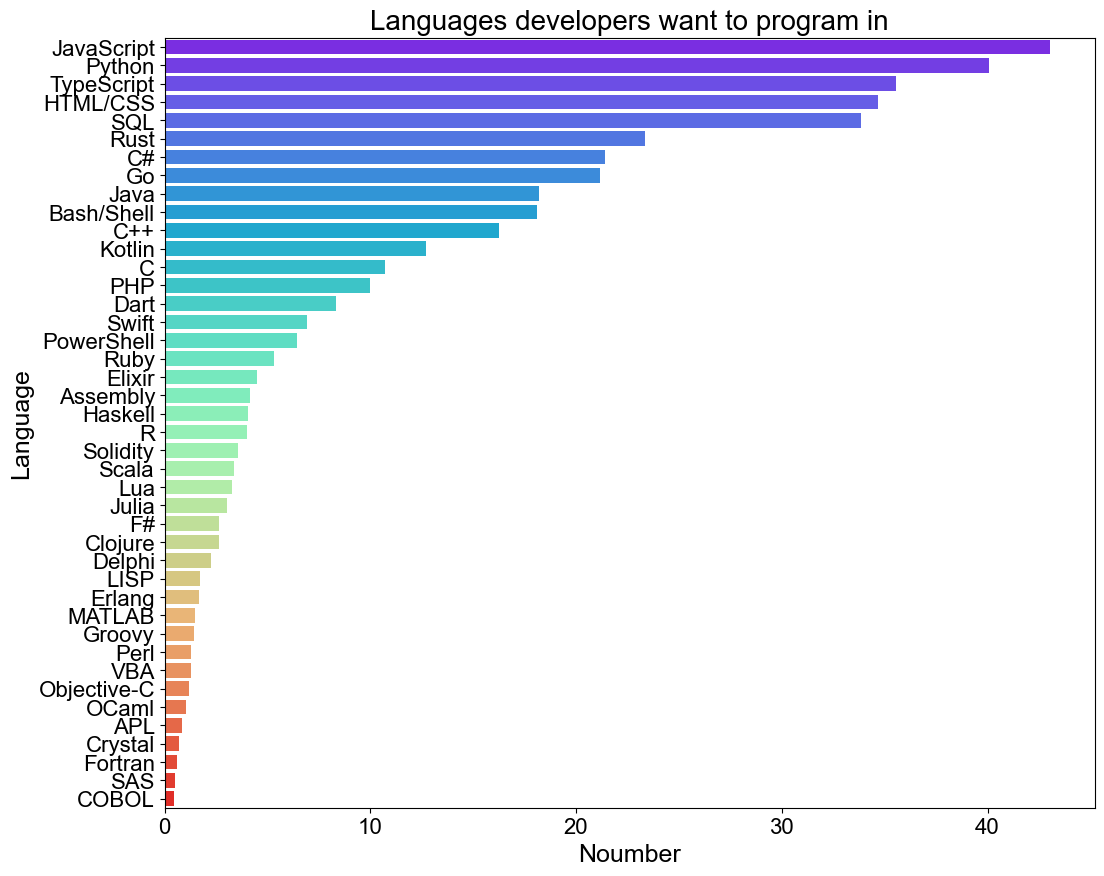

In [61]:
#set size
plt.figure(figsize = (12, 10))

#plot
sns.barplot(
    data=want,
    x='Count',
    y='Type',
    palette='rainbow')

# labels and title
plt.xlabel('Noumber', fontsize = 18)
plt.ylabel('Language', fontsize = 18)
plt.title('Languages developers want to program in', fontsize = 20)

# Wyświetlenie wykresu
plt.savefig('languagesDevelopersWantToProgramIn.png')
plt.show()

## marging plotes

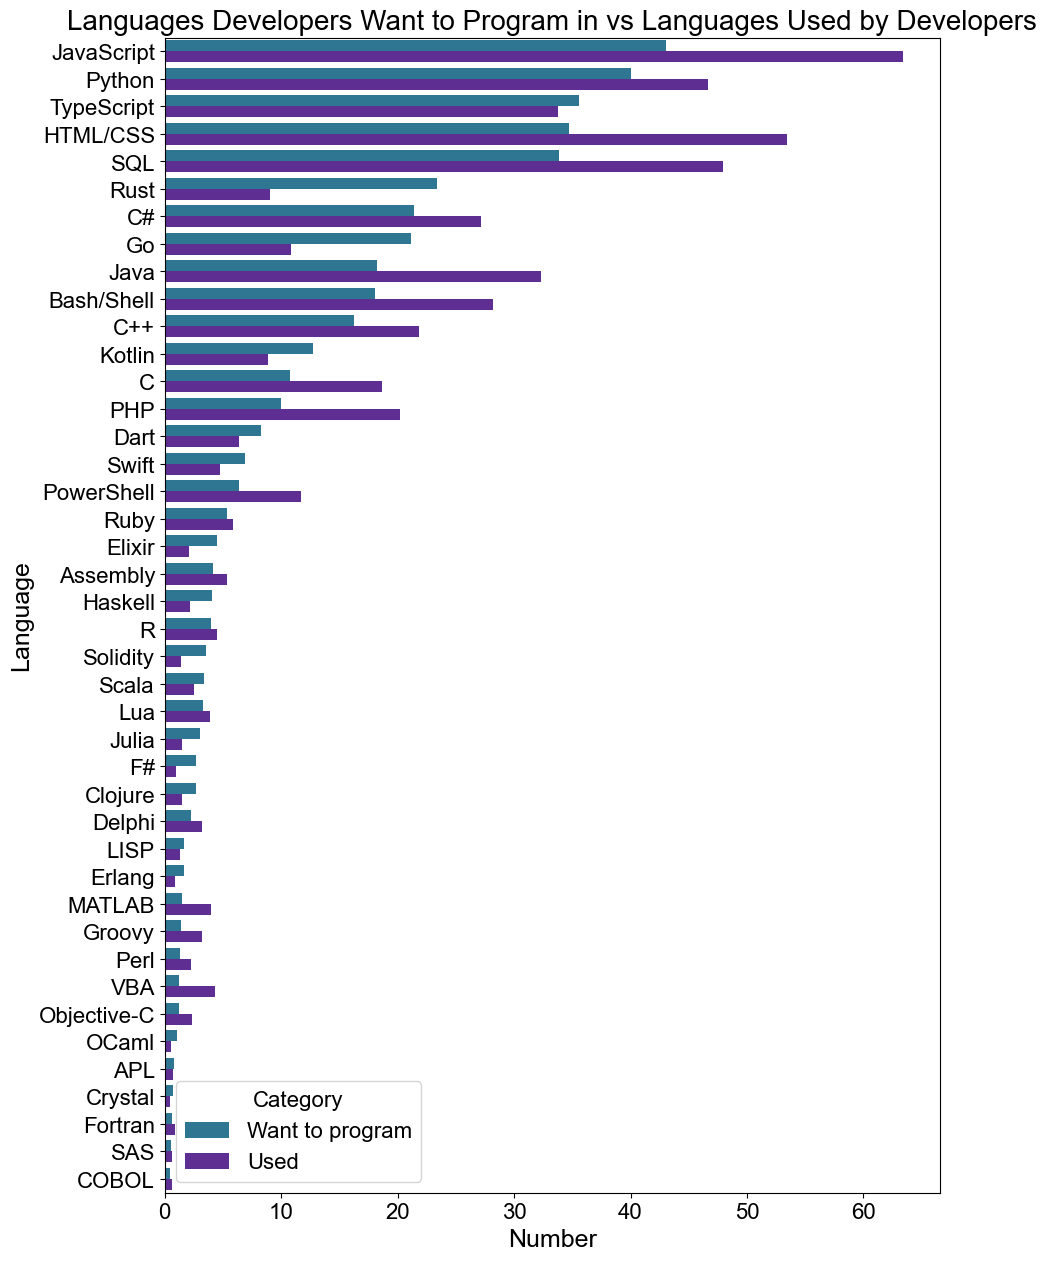

In [63]:
# merging data
combined_data = pd.concat([want, used], keys=['Want to program', 'Used'])

# colors
palette = {'Want to program': '#1d7da3', 'Used': '#5e1da3'}

# size
plt.figure(figsize=(10, 15))

# plot
sns.barplot(
    data=combined_data,
    x='Count',
    y='Type',
    hue=combined_data.index.get_level_values(0),
    palette=palette
)

# labels and title
plt.xlabel('Number', fontsize=18)
plt.ylabel('Language', fontsize=18)
plt.title('Languages Developers Want to Program in vs Languages Used by Developers', fontsize=20)

# legend
plt.legend(title='Category')

#show
plt.savefig('mergedPlots.png')
plt.show()